# 4.1 선형 회귀


## matplotlib에서 한글 쓰기

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#마이너스 폰트가 깨지는 것을 막기 위해


In [2]:
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.3
설치 위치:  C:\Users\sarah\Anaconda3\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\sarah\.matplotlib
캐시 위치:  C:\Users\sarah\.matplotlib


In [3]:
print ('설정파일 위치: ', mpl.matplotlib_fname())

설정파일 위치:  C:\Users\sarah\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [4]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

In [5]:
# ttf 폰트 전체 갯수
f = [f.name for f in fm.fontManager.ttflist]
print(len(font_list))

# 10개의 폰트명 만 출력
f[:10]

1446


['DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'cmb10',
 'STIXSizeFourSym',
 'cmr10',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Serif',
 'DejaVu Sans Display']

In [6]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

[('Nanum YeorIrCe',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 열일체.ttf'),
 ('Nanum SaRangHaeADeur',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 사랑해 아들.ttf'),
 ('Nanum HyoNamNeurHwaITing',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 효남 늘 화이팅.ttf'),
 ('Nanum JeongEunCe',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 정은체.ttf'),
 ('Nanum MongDor',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 몽돌.ttf'),
 ('Nanum HarABeoJiEuiNaNum',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 할아버지의나눔.ttf'),
 ('Nanum MasIssNeunCe',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 맛있는체.ttf'),
 ('Nanum MuGungHwa',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손글씨 무궁화.ttf'),
 ('NanumGothic', 'C:\\Windows\\Fonts\\NanumGothicLight.ttf'),
 ('Nanum GimYuICe',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\나눔손

('NanumGothicCoding',
  'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf')

In [7]:
#fontprop 각각 설정해서 할 수 있는 코드
path = 'C:\\Users\\sarah\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothicCoding.ttf'
fontprop = fm.FontProperties(fname=path, size=18)

#또는 한 번에 설정하는 코드
plt.rcParams["font.family"] = 'NanumGothicCoding'

## 4.1.1 정규방정식

[참고](https://github.com/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb)

In [8]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

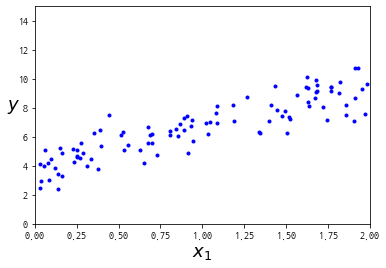

In [9]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

무작위로 생성한 선형 데이터셋

In [10]:
#모든 샘플에 x0=1을 추가 
X_b = np.c_[np.ones( (100,1) ), X] #np.c_ : column stack
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
#np.linalg : linear algebra, inv() : inverse matrix, dot() : dot product

In [11]:
print(theta_best)

[[3.90344349]
 [2.81298563]]


의도한 바는 4와 3이었는데 잡음 때문에 정확하게 예측하지 못함.

In [12]:
#theta hat을 이용하여 예측

X_new = np.array([ [0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #모든 샘플에 x0=1을 추가
y_predict =  X_new_b.dot(theta_best)
y_predict

array([[3.90344349],
       [9.52941475]])

<function matplotlib.pyplot.show(close=None, block=None)>

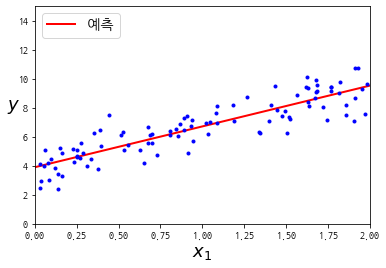

In [13]:
plt.rcParams["font.family"] = 'NanumGothicCoding'

plt.plot(X_new, y_predict, "r-", linewidth=2, label="예측")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show

In [14]:
#사이킷런에서 선형 회귀하기
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.90344349]), array([[2.81298563]]))

In [15]:
lin_reg.predict(X_new)

array([[3.90344349],
       [9.52941475]])

Linear Regression 클래스는 scipy.linalg.lstsq() 함수(least square)를 기반으로 함.

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) #rcond : 작은 특이값에 대한 차단 비율
theta_best_svd #svd : singular value decomposition

array([[3.90344349],
       [2.81298563]])

$ 
\bf{\hat{\bf{\theta}} } = \bf{X}^+ \bf{y}
$
를 계산. $ \bf {X}^+  $ 는 유사역행렬(pseudo inverse, Moore-Penrose inverse).

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[3.90344349],
       [2.81298563]])